In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from object_detection import *
from utils import visualization_utils as vis_util
import PIL.Image as Image
# i prefer PIL to draw the text, more beautiful
import PIL.ImageDraw as ImageDraw
import PIL.ImageFont as ImageFont

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
/usr/local/lib/python3.5/dist-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [2]:
image = cv2.imread('test1.jpg')
rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
boxes, scores, classes, num_detections = detect_object(rgb_image)

In [3]:
# [ymin, xmin, ymax, xmax]
def get_bounding_box(bbox):
    return int(bbox[0]*image.shape[0]),int(bbox[1]*image.shape[1]),\
    int(bbox[2]*image.shape[0]),int(bbox[3]*image.shape[1])

get_bounding_box(boxes[0,0,:])

(415, 835, 481, 941)

In [4]:
initial_width = 6 # 6m
known_distance = 5 # 5m
initial_pixel_distance = (image.shape[1]*0.95 - image.shape[1]*0.2)
focal_length = (initial_pixel_distance * known_distance) / initial_width
focal_length

800.0

In [5]:
def distance_to_camera(known_width, focal_length, width):
    return (known_width * focal_length) / width

In [6]:
distance_car = distance_to_camera(initial_width, focal_length, 100)
distance_car

48.0

In [7]:
def distance(x1, y1, x2, y2):
    return np.sqrt((np.abs(x2-x1))**2+((np.abs(y2-y1)))**2)

def center_box(bbox):
    ymin, xmin, ymax, xmax = get_bounding_box(bbox)
    return int(ymin+((ymax-ymin)/2)), int(xmin+((xmax-xmin)/2))

In [8]:
car_x, car_y = center_box(boxes[0,0,:])
camera_x, camera_y = image.shape[1]//2,image.shape[0]

In [9]:
hypotenuse = distance(car_x,car_y,camera_x,camera_y)
horizontal = distance(car_x,car_y,camera_x,car_y)
thirdline = distance(camera_x,camera_y,camera_x,car_y)
angle = np.arcsin((thirdline/hypotenuse))* 180/np.pi
angle

41.18592516570964

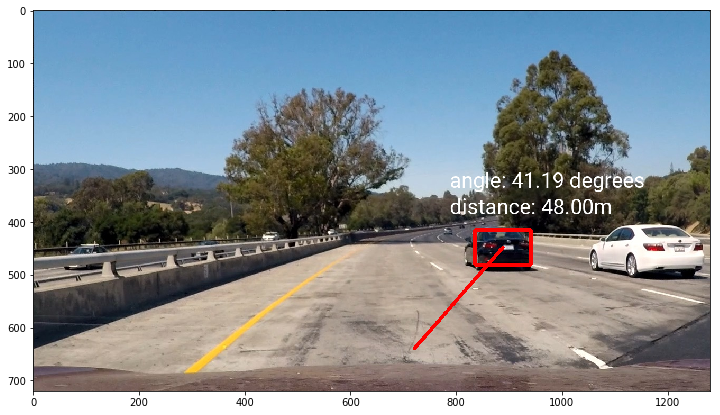

In [10]:
plt.figure(figsize = (15, 7))
copied = np.copy(rgb_image)
ymin, xmin, ymax, xmax = get_bounding_box(boxes[0,0,:])
cv2.rectangle(copied,(xmin,ymin),(xmax,ymax),(255,0,0),5)
cv2.line(copied,(camera_y, camera_x),(car_y, car_x),(255,0,0),5)

pil_image = Image.fromarray(np.uint8(copied))
draw = ImageDraw.Draw(pil_image)
font = ImageFont.truetype('Roboto-Regular.ttf', 40)

draw.text((car_y-100,car_x-100),'distance: %.2fm'%(distance_car),fill='white',font=font)
draw.text((car_y-100,car_x-150),'angle: %.2f degrees'%(angle),fill='white',font=font)

plt.imshow(np.array(pil_image))
plt.show()